In [1]:
# Jupyter notebook CELL 1 for exercise
import requests
from typing import List
# Get the names of astronauts on board the ISS 
astros_json = requests.get('http://api.open-notify.org/astros.json').json()
astro_names = []
for astro_info in astros_json['people']:
    astro_names.append(astro_info['name'])
# Note: equivalent to astro_names = [astro_info['name'] for astro_info in astros_json['people']]
print(astro_names)

['Mark Vande Hei', 'Pyotr Dubrov', 'Anton Shkaplerov', 'Zhai Zhigang', 'Wang Yaping', 'Ye Guangfu', 'Raja Chari', 'Tom Marshburn', 'Kayla Barron', 'Matthias Maurer', 'Alexander Misurkin', 'Yusaku Maezawa', 'Yozo Hirano']


In [2]:
# Jupyter notebook CELL 2 for exercise
import time
from datetime import datetime
import reverse_geocode

n_trials = 3
trial_pause_seconds = 5.0
for i_trial in range(n_trials):
    # Get date and time
    date_time_now = datetime.now()
    time_str = date_time_now.strftime("%d-%b-%Y %H:%M:%S")
    # ISS position
    issnow_json = requests.get('http://api.open-notify.org/iss-now.json').json()
    if issnow_json['message']  == 'success':
        iss_latlong = (issnow_json['iss_position']['latitude'], 
                       issnow_json['iss_position']['longitude'])
        # The search method expects a list and returns a list.
        # Hence we need to coerce a single value latlong to a list with [latlong]
        # Afterwards we need to extract the result, itself a single-item list, with result_list[0]
        iss_pos_list = reverse_geocode.search([iss_latlong])
        iss_pos = iss_pos_list[0]
        iss_info = f'At {time_str}, the ISS was above {iss_pos["city"]} in {iss_pos["country"]}'
        print(iss_info)
        time.sleep(trial_pause_seconds)

At 19-Dec-2021 19:43:43, the ISS was above Carnarvon in Australia
At 19-Dec-2021 19:43:49, the ISS was above Carnarvon in Australia
At 19-Dec-2021 19:43:54, the ISS was above Carnarvon in Australia


In [3]:
import sys

In [4]:
sys.path.append("/home/laurammodernell/IORDS/python-lectures/space/")

In [5]:
import iss

In [6]:
iss.get_astro_names()

['Mark Vande Hei',
 'Pyotr Dubrov',
 'Anton Shkaplerov',
 'Zhai Zhigang',
 'Wang Yaping',
 'Ye Guangfu',
 'Raja Chari',
 'Tom Marshburn',
 'Kayla Barron',
 'Matthias Maurer',
 'Alexander Misurkin',
 'Yusaku Maezawa',
 'Yozo Hirano']

In [7]:
iss.get_iss_positions(10, 2)

['At 19-Dec-2021 19:45:34, the ISS was above Port Hedland in Australia',
 'At 19-Dec-2021 19:45:36, the ISS was above Port Hedland in Australia',
 'At 19-Dec-2021 19:45:39, the ISS was above Port Hedland in Australia',
 'At 19-Dec-2021 19:45:41, the ISS was above Port Hedland in Australia',
 'At 19-Dec-2021 19:45:44, the ISS was above Port Hedland in Australia',
 'At 19-Dec-2021 19:45:46, the ISS was above Port Hedland in Australia',
 'At 19-Dec-2021 19:45:49, the ISS was above Port Hedland in Australia',
 'At 19-Dec-2021 19:45:51, the ISS was above Port Hedland in Australia',
 'At 19-Dec-2021 19:45:54, the ISS was above Port Hedland in Australia',
 'At 19-Dec-2021 19:45:56, the ISS was above Port Hedland in Australia']

In [8]:
import importlib
importlib.reload(iss)

<module 'iss' from '/home/laurammodernell/IORDS/python-lectures/space/iss.py'>

In [9]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
a_1d = np.array([2, 3, 5])
b_1d = np.array([4, 6, 7])

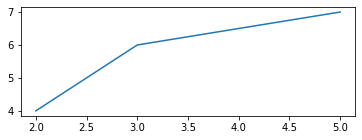

In [11]:
plt.figure(figsize=(6,2))
plt.plot(a_1d, b_1d);

In [21]:
plt.plot?

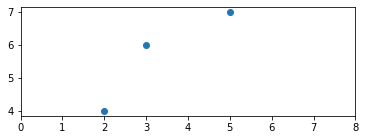

In [12]:
plt.figure(figsize=(6,2))
plt.scatter(a_1d, b_1d)
plt.xlim((0, 8));

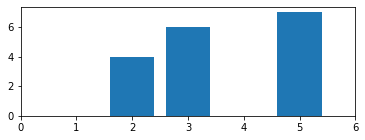

In [13]:
plt.figure(figsize=(6,2))
plt.bar(a_1d, b_1d)
plt.xlim((0, 6));

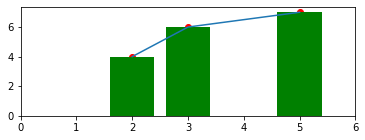

In [14]:
plt.figure(figsize=(6,2))
plt.plot(a_1d, b_1d)
plt.scatter(a_1d, b_1d, c='r')
plt.bar(a_1d, b_1d, color='g')
plt.xlim((0, 6));

In [15]:
import random

In [16]:
random.seed(13)
rand6_1000 = random.choices(range(6), weights=[0.1, 0.35, 0.05, 0.1, 0.05, 0.35], k=1000)

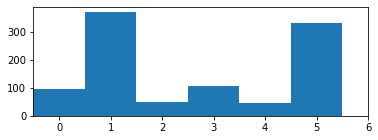

In [17]:
plt.figure(figsize=(6,2))
plt.hist(rand6_1000, bins=np.arange(-0.5, 6)) # [-0.5, 0.5], [0.5, 1.5], ..., [4.5, 5.5] 
plt.xlim((-0.5, 6));

In [18]:
np.random.seed(42)
rand_gauss = np.random.normal(3, 0.7, 1000)

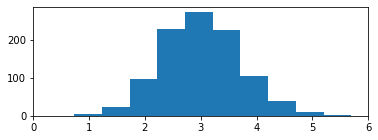

In [19]:
plt.figure(figsize=(6,2))
plt.hist(rand_gauss)
plt.xlim((0, 6));

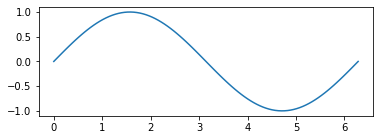

In [20]:
x = np.linspace(0, 2*np.pi, 100)
y_sin = np.sin(x)
plt.figure(figsize=(6,2))
plt.plot(x, y_sin);

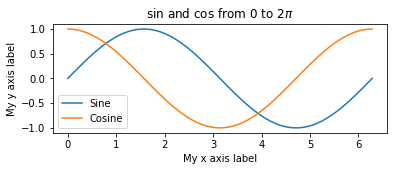

In [21]:
y_cos = np.cos(x)
# Plot the points using matplotlib
plt.figure(figsize=(6,2))
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('My x axis label')
plt.ylabel('My y axis label')
plt.title('sin and cos from 0 to $2\pi$')
plt.legend(['Sine', 'Cosine']);

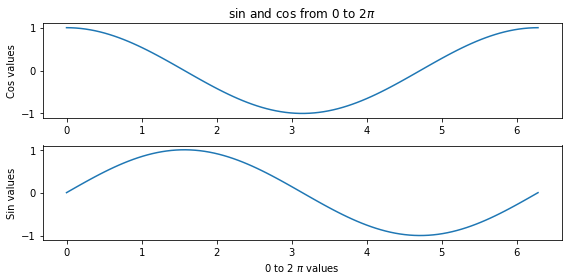

In [22]:
# Let's plot a total of 2 figures: 1 column and 2 rows
plt.figure(figsize=(8, 4))
n_plots = 2
n_cols = 1
# Plot first figure
plt.subplot(n_plots, n_cols, 1)
plt.plot(x, y_cos)
plt.ylabel('Cos values')
plt.title('sin and cos from 0 to $2\pi$')
# Plot second figure
plt.subplot(n_plots, n_cols, 2)
plt.plot(x, y_sin)
plt.xlabel('0 to 2 $\pi$ values')
plt.ylabel('Sin values')
plt.tight_layout() # Magic command to optimize the overall plot display

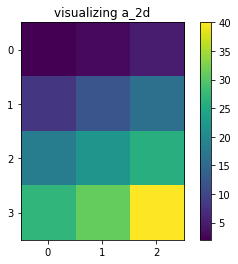

In [23]:
a_2d = np.array([[2, 3, 5], 
                 [8, 12, 16], 
                 [18, 22, 26],
                 [27, 31, 40]] )
plt.imshow(a_2d)
# Making sure x and y ticks are integers
plt.xticks(np.arange(0, a_2d.shape[1]))
plt.yticks(np.arange(0, a_2d.shape[0]))
# Adding a colorbar
plt.colorbar()
plt.title('visualizing a_2d');

In [24]:
import os

In [25]:
home_data_path = os.path.expanduser('~') 
data_path = os.path.join(home_data_path, 'python_lecture', 'inflammation_data')
first_file = os.path.join(data_path, 'inflammation-01.csv')

In [26]:
file_handler = open(first_file, 'r')

FileNotFoundError: [Errno 2] No such file or directory: '/home/laurammodernell/python_lecture/inflammation_data/inflammation-01.csv'

In [27]:
with open(first_file, 'r') as file_handler:
    file_content = file_handler.read()

FileNotFoundError: [Errno 2] No such file or directory: '/home/laurammodernell/python_lecture/inflammation_data/inflammation-01.csv'